In [1]:
import pandas
import sklearn
import numpy

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, MDS, Isomap

import matplotlib

In [2]:
filename = "/Users/simondi/PHD/data/data/target_infect_x/screening_data_subset/cells_sample_10_100lines_normalized.tsv"

In [10]:
data = pandas.read_csv(filename, sep="\t", header=0)

In [8]:
feature_cols = [(i, x) for i, x in enumerate(data.columns.values) if x.startswith("cells")]
for i, c in feature_cols:
    data.loc[:, c] = data.loc[:, c].astype('float64')

In [6]:
grops = ['pathogen', 'library', 'design', 'replicate', 'gene']

In [7]:
grop_cnt = data.query("design=='p' and library=='d' and replicate==1 and study=='infectx'").groupby("gene").size()

In [8]:
#data.query("design=='p' and library=='d' and replicate==1 and study=='infectx'").groupby("gene").filter(lambda x: len(x) >= 40).groupby("gene").size()

In [5]:
data_new = data.query("library=='d' and design=='p' and replicate==1 and (pathogen=='brucella' or pathogen=='listeria' or pathogen=='adeno' or pathogen=='bartonella')").groupby(["gene"]).filter(lambda x: len(x) == 40)

In [23]:
data_new=data
data_new

,Unnamed: 0,study,pathogen,library,design,replicate,plate,well,gene,sirna,...,cells.location_center_y,cells.neighbors_anglebetweenneighbors_2,cells.neighbors_firstclosestobjectnumber_2,cells.neighbors_firstclosestxvector_2,cells.neighbors_firstclosestyvector_2,cells.neighbors_numberofneighbors_2,cells.neighbors_secondclosestobjectnumber_2,cells.neighbors_secondclosestxvector_2,cells.neighbors_secondclosestyvector_2,cells.parent_nuclei
0,0,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.345202,1.301173,0.100325,0.761244,-1.374672,-0.261694,-0.010014,-0.461912,1.410065,0.097498
1,1,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.164637,-0.554651,0.325801,-0.458264,0.985408,-0.878543,0.226578,-1.047799,-0.677082,0.367808
2,2,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-1.080995,0.582009,0.855669,-0.225497,1.050242,1.588854,0.992685,0.766293,-0.748770,0.840850
3,3,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.213737,0.414784,0.788026,-0.348573,-1.435837,0.355156,0.891289,1.195796,0.841375,0.807061
4,4,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.303013,1.287706,1.182609,-0.387990,1.471378,1.588854,1.330674,0.522630,-1.351170,1.212526
5,5,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.792127,-0.166778,0.754205,-1.206571,-1.019977,-0.878543,0.970153,1.341965,-0.729474,0.829587
6,6,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.586871,-0.954583,-0.181519,-0.390089,1.518470,2.205704,0.057583,1.785465,0.745665,-0.161549
7,7,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.929699,-0.339761,0.742931,-0.789894,0.010004,-0.878543,0.846224,0.202449,-1.002976,0.863376
8,8,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.432766,1.206984,-1.263803,0.934723,-0.348050,-0.261694,-1.474632,-0.860224,0.093600,-1.287840
9,9,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.870264,-0.660727,0.382170,-0.712999,-0.754498,-0.878543,0.542034,0.763965,-0.689292,0.480437


In [24]:
data_new.loc[numpy.isnan(data_new["cells.children_invasomes_count"])].groupby("pathogen").size()

pathogen
listeria    99
dtype: int64

In [25]:
data_new.loc[numpy.isfinite(data_new["cells.children_invasomes_count"])].groupby("pathogen").size()

Series([], dtype: int64)

In [26]:
data_new

,Unnamed: 0,study,pathogen,library,design,replicate,plate,well,gene,sirna,...,cells.location_center_y,cells.neighbors_anglebetweenneighbors_2,cells.neighbors_firstclosestobjectnumber_2,cells.neighbors_firstclosestxvector_2,cells.neighbors_firstclosestyvector_2,cells.neighbors_numberofneighbors_2,cells.neighbors_secondclosestobjectnumber_2,cells.neighbors_secondclosestxvector_2,cells.neighbors_secondclosestyvector_2,cells.parent_nuclei
0,0,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.345202,1.301173,0.100325,0.761244,-1.374672,-0.261694,-0.010014,-0.461912,1.410065,0.097498
1,1,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.164637,-0.554651,0.325801,-0.458264,0.985408,-0.878543,0.226578,-1.047799,-0.677082,0.367808
2,2,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-1.080995,0.582009,0.855669,-0.225497,1.050242,1.588854,0.992685,0.766293,-0.748770,0.840850
3,3,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.213737,0.414784,0.788026,-0.348573,-1.435837,0.355156,0.891289,1.195796,0.841375,0.807061
4,4,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.303013,1.287706,1.182609,-0.387990,1.471378,1.588854,1.330674,0.522630,-1.351170,1.212526
5,5,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.792127,-0.166778,0.754205,-1.206571,-1.019977,-0.878543,0.970153,1.341965,-0.729474,0.829587
6,6,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.586871,-0.954583,-0.181519,-0.390089,1.518470,2.205704,0.057583,1.785465,0.745665,-0.161549
7,7,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.929699,-0.339761,0.742931,-0.789894,0.010004,-0.878543,0.846224,0.202449,-1.002976,0.863376
8,8,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.432766,1.206984,-1.263803,0.934723,-0.348050,-0.261694,-1.474632,-0.860224,0.093600,-1.287840
9,9,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.870264,-0.660727,0.382170,-0.712999,-0.754498,-0.878543,0.542034,0.763965,-0.689292,0.480437


In [27]:
del data_new["cells.children_invasomes_count"]
del data_new["cells.children_bacteria_count"]

In [28]:
feature_cols_idxs = [ x for x in data_new.columns.values if x.startswith("cells")]
feature_cols_idxs
X = data_new.dropna()
#data_new[numpy.isfinite(data_new.loc[:, feature_cols_idxs]) | numpy.isnan(data_new[:, feature_cols_idxs])]

In [29]:
data_new

,Unnamed: 0,study,pathogen,library,design,replicate,plate,well,gene,sirna,...,cells.location_center_y,cells.neighbors_anglebetweenneighbors_2,cells.neighbors_firstclosestobjectnumber_2,cells.neighbors_firstclosestxvector_2,cells.neighbors_firstclosestyvector_2,cells.neighbors_numberofneighbors_2,cells.neighbors_secondclosestobjectnumber_2,cells.neighbors_secondclosestxvector_2,cells.neighbors_secondclosestyvector_2,cells.parent_nuclei
0,0,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.345202,1.301173,0.100325,0.761244,-1.374672,-0.261694,-0.010014,-0.461912,1.410065,0.097498
1,1,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.164637,-0.554651,0.325801,-0.458264,0.985408,-0.878543,0.226578,-1.047799,-0.677082,0.367808
2,2,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-1.080995,0.582009,0.855669,-0.225497,1.050242,1.588854,0.992685,0.766293,-0.748770,0.840850
3,3,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.213737,0.414784,0.788026,-0.348573,-1.435837,0.355156,0.891289,1.195796,0.841375,0.807061
4,4,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.303013,1.287706,1.182609,-0.387990,1.471378,1.588854,1.330674,0.522630,-1.351170,1.212526
5,5,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.792127,-0.166778,0.754205,-1.206571,-1.019977,-0.878543,0.970153,1.341965,-0.729474,0.829587
6,6,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,0.586871,-0.954583,-0.181519,-0.390089,1.518470,2.205704,0.057583,1.785465,0.745665,-0.161549
7,7,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.929699,-0.339761,0.742931,-0.789894,0.010004,-0.878543,0.846224,0.202449,-1.002976,0.863376
8,8,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,1.432766,1.206984,-1.263803,0.934723,-0.348050,-0.261694,-1.474632,-0.860224,0.093600,-1.287840
9,9,infectx_published,listeria,a,u,1,kb2-02-1x,a01,chka,s3008,...,-0.870264,-0.660727,0.382170,-0.712999,-0.754498,-0.878543,0.542034,0.763965,-0.689292,0.480437


In [16]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, )

In [15]:
#X_ = pca.fit_transform(X.loc[:, feature_cols_idxs])

In [30]:
X_ = tsne.fit_transform(X.loc[:, feature_cols_idxs], )

In [31]:
uniq = list(set(X['pathogen']))

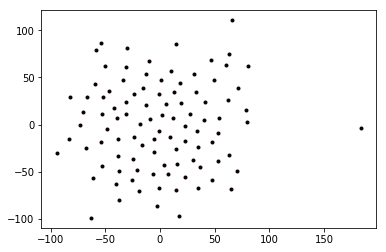

In [32]:
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx


hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

for i in range(len(uniq)):
    indx = X['pathogen'] == uniq[i]
    plt.scatter(X_[indx,1], X_[indx,0], color=scalarMap.to_rgba(i), label=uniq[i], marker=".")

plt.show()